In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/stocks.csv', index_col='Date', parse_dates=['Date'])

In [3]:
df.head()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [6]:
df.index.dayofweek

Int64Index([2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
            ...
            0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
           dtype='int64', name='Date', length=1257)

In [9]:
df['End_Month'] = df.index.is_month_end

In [10]:
df.head()

,AAPL,GOOGL,FB,MSFT,AMZN,End_Month
Date,,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989,False
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015,False
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985,False
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985,False
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010,False


In [13]:
df.resample('BM')['AAPL'].sum().index

DatetimeIndex(['2014-11-28', '2014-12-31', '2015-01-30', '2015-02-27',
               '2015-03-31', '2015-04-30', '2015-05-29', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-30',
               '2015-11-30', '2015-12-31', '2016-01-29', '2016-02-29',
               '2016-03-31', '2016-04-29', '2016-05-31', '2016-06-30',
               '2016-07-29', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-30', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31',
               '2017-11-30', '2017-12-29', '2018-01-31', '2018-02-28',
               '2018-03-30', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-29', '2019-04-30', '2019-05-31', '2019-06-28',
      

In [15]:
df['Day'] = df.index.dayofweek

In [19]:
df.groupby('Day')['AAPL'].std()

Day
0    39.141744
1    39.351026
2    39.330506
3    39.610497
4    39.611408
Name: AAPL, dtype: float64

In [23]:
df = df.reset_index()

In [24]:
df = df.set_index('Date')

In [22]:
df.index.astype('object')

Index([2014-11-05 00:00:00, 2014-11-06 00:00:00, 2014-11-07 00:00:00,
       2014-11-10 00:00:00, 2014-11-11 00:00:00, 2014-11-12 00:00:00,
       2014-11-13 00:00:00, 2014-11-14 00:00:00, 2014-11-17 00:00:00,
       2014-11-18 00:00:00,
       ...
       2019-10-21 00:00:00, 2019-10-22 00:00:00, 2019-10-23 00:00:00,
       2019-10-24 00:00:00, 2019-10-25 00:00:00, 2019-10-28 00:00:00,
       2019-10-29 00:00:00, 2019-10-30 00:00:00, 2019-10-31 00:00:00,
       2019-11-01 00:00:00],
      dtype='object', name='Date', length=1257)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df.drop(['End_Month', 'Day'], axis=1, inplace=True)

In [30]:
df.head()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


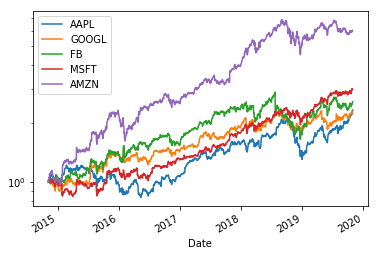

In [45]:
%matplotlib inline
(df / df.shift(1)).cumprod().plot(logy=True);

In [35]:
simple_array = np.array([1, 2, 3, 4])

In [64]:
((df.resample('W-Fri').last() / df.resample('W-Fri').last().shift(1) - 1)*100).mean()

AAPL     0.390394
GOOGL    0.376689
FB       0.427487
MSFT     0.460366
AMZN     0.763820
dtype: float64

In [65]:
df / df.shift(1)

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,0.998530,0.992337,1.005746,1.017551,1.000405
2014-11-07,1.002852,1.000236,1.004518,0.999589,1.010855
2014-11-10,0.998349,1.011616,0.992064,1.004314,1.017508
2014-11-11,1.007994,1.005482,0.994800,0.999591,1.022615
2014-11-12,1.014129,0.994584,1.001474,0.998158,0.998397
2014-11-13,1.014112,0.996758,0.993710,1.017015,1.015955
2014-11-14,1.012055,0.997754,1.008485,0.999395,1.035832
2014-11-17,0.998336,0.984600,0.991453,0.997580,0.985449


In [67]:
(100 * 1.10) * .9

99.00000000000001

In [70]:
simple_array.cumprod()**(1/4)

array([1.        , 1.18920712, 1.56508458, 2.21336384])

In [71]:
from scipy.stats import gmean

In [77]:
gmean((df.resample('W-Fri').last() / df.resample('W-Fri').last().shift(1)).dropna()) - 1

array([0.00328629, 0.00321794, 0.00362363, 0.00417252, 0.00689853])

In [83]:
(gmean((df['AMZN'].resample('M').last() / df['AMZN'].resample('M').last().shift(1)).dropna()) - 1)*100

2.8152966630539122

In [84]:
df['Year'] = df.index.year

In [93]:
(gmean((df[df.index.year == 2019]['AMZN'].resample('M').last() / df[df.index.year == 2019]['AMZN'].resample('M').last().shift()).dropna()) - 1)*100

0.4152005631931299

In [94]:
df.drop('Year', axis=1, inplace=True)

In [99]:
df['FB-Rolling'] = df.loc[:, 'FB'].rolling(100).mean()

In [96]:
df.rolling(3).mean()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,NaN,NaN,NaN,NaN,NaN
2014-11-07,108.856667,553.153340,75.230001,48.413334,297.673330
2014-11-10,108.846667,553.913330,75.286667,48.756667,300.536662
2014-11-11,109.180000,557.113322,75.070000,48.813333,305.659993
2014-11-12,109.926666,559.256653,74.776667,48.846666,309.543335
2014-11-13,111.256666,558.659993,74.526667,49.086666,313.333344
2014-11-14,112.750000,556.626668,74.616666,49.323334,318.603343
2014-11-17,113.663333,552.756673,74.456665,49.550001,322.450002


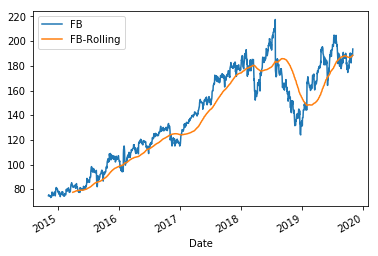

In [100]:
df[['FB', 'FB-Rolling']].plot()

In [108]:
(df['MSFT'] / df.loc[:, 'MSFT'].rolling(10).mean()).nsmallest(1)

Date
2015-08-25    0.894266
Name: MSFT, dtype: float64

In [111]:
df['MSFT'].rolling(3).mean().head()

Date
2014-11-05          NaN
2014-11-06          NaN
2014-11-07    48.413334
2014-11-10    48.756667
2014-11-11    48.813333
Name: MSFT, dtype: float64

In [115]:
df['MSFT'].ewm(alpha=0.5).mean().head()

Date
2014-11-05    47.860001
2014-11-06    48.420001
2014-11-07    48.568572
2014-11-10    48.740000
2014-11-11    48.807096
Name: MSFT, dtype: float64

In [116]:
df['MSFT'].head()

Date
2014-11-05    47.860001
2014-11-06    48.700001
2014-11-07    48.680000
2014-11-10    48.889999
2014-11-11    48.869999
Name: MSFT, dtype: float64

In [119]:
(48.7 + (1-.5)*47.86) / (1 + (1 - 0.5))

48.419999999999995

In [122]:
(48.68 + (1 - .5)*48.7 + ((1 - .5)**2)*47.86) / (1 + .5 + .25)

48.56857142857143

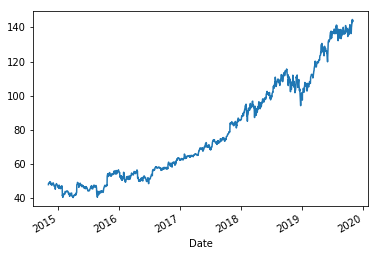

In [125]:
df['MSFT'].plot()

In [131]:
df['MSFT'].diff()

Date
2014-11-05         NaN
2014-11-06    0.840000
2014-11-07   -0.020001
2014-11-10    0.209999
2014-11-11   -0.020000
2014-11-12   -0.090000
2014-11-13    0.830002
2014-11-14   -0.029999
2014-11-17   -0.120003
2014-11-18   -0.719997
2014-11-19   -0.520001
2014-11-20    0.480000
2014-11-21   -0.720001
2014-11-24   -0.390000
2014-11-25   -0.119999
2014-11-26    0.279999
2014-11-28    0.060001
2014-12-01    0.809998
2014-12-02   -0.160000
2014-12-03   -0.379997
2014-12-04    0.759998
2014-12-05   -0.420002
2014-12-08   -0.719997
2014-12-09   -0.110001
2014-12-10   -0.689998
2014-12-11    0.269996
2014-12-12   -0.219997
2014-12-15   -0.280003
2014-12-16   -1.509998
2014-12-17    0.580002
                ...   
2019-09-23   -0.300003
2019-09-24   -1.759994
2019-09-25    1.979996
2019-09-26    0.179992
2019-09-27   -1.809997
2019-09-30    1.300003
2019-10-01   -1.959992
2019-10-02   -2.420013
2019-10-03    1.630005
2019-10-04    1.839996
2019-10-07   -1.000000
2019-10-08   -1.449997
2019-1